In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [3]:
'''
读取和显示数据,文件名为‘Folds5x2_pp.csv’，需要跟代码文件放在同一目录下
'''
data = pd.read_csv('Folds5x2_pp.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
#显示数据的维度
data.shape

(9568, 5)

In [6]:
#将特征和标签数据分开
X = data[['AT','V','AP','RH']] #X为特征数据
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
Y = data[['PE']]  #Y为标签数据
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [23]:
#将X，Y数据划分为训练集和测试集
#from sklearn.cross_validation import train_test_split 原代码导入错误，库有更新
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7176, 4)
(2392, 4)
(7176, 1)
(2392, 1)


In [24]:
#创建模型，并根据测试集让模型进行拟合
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() 
linreg.fit(x_train,y_train)
print(linreg.intercept_) #显示拟合后的偏置
print(linreg.coef_)  #显示拟合后各特征的权重组合

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [27]:
#对拟合的模拟在验证集上验证
from sklearn import metrics
y_pred = linreg.predict(x_test) #根据x_test求对应的预测值
loss_MSE = metrics.mean_squared_error(y_test,y_pred) #用MSE求测试集的损失值，具体含义为，先求每个预测值和实际值的差值的平方，然后全部加起来之后除以数据的个数
print('LOSS_MSE:',loss_MSE)

LOSS_MSE: 20.08040120207389


In [28]:
#使用交叉验证的方式建立模型，无须手动划分训练和测试集
from sklearn.model_selection import cross_val_predict
new_predicted = cross_val_predict(linreg,X,Y,cv=10)
loss_MSE_new = metrics.mean_squared_error(Y,new_predicted) #用MSE求测试集的损失值，具体含义为，先求每个预测值和实际值的差值的平方，然后全部加起来之后除以数据的个数
print('LOSS_MSE_new:',loss_MSE_new)  #结果跟手动划分训练测试集基本差不多，甚至比手动划分的要更差一点，原因是手动划分的测试集样本数量下，可能存在误差

LOSS_MSE_new: 20.795597461943107


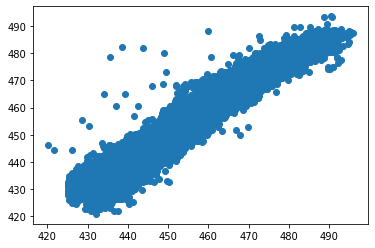

In [32]:
#画图观察结果
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
plt.scatter(Y,new_predicted) 

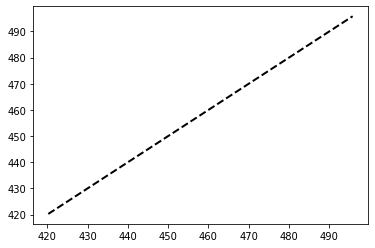

In [33]:
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=2) #第一个数组参数表示了所有点的x坐标，第二个数组表示了所有点的y坐标

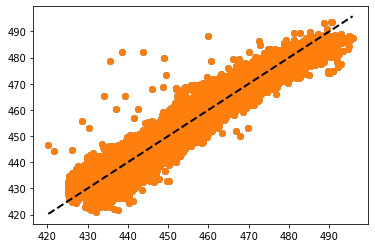

In [35]:
#把上面的两个图合起来，只能在ax上操作，fig只是用来显示，如果用plt的画会新建一个小的画布，不能将两个图合并起来
ax.scatter(Y,new_predicted)
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=2)
fig